## The distributions of breweries in the US 

,obdb_id,name,brewery_type,street,address_2,address_3,city,state,county_province,postal_code,website_url,phone,country,longitude,latitude,tags
0,10-56-brewing-company-knox,10-56 Brewing Company,micro,400 Brown Cir,NaN,NaN,Knox,Indiana,NaN,46534,NaN,6308165790,United States,-86.627954,41.289715,NaN
1,10-barrel-brewing-co-bend-1,10 Barrel Brewing Co,large,62970 18th St,NaN,NaN,Bend,Oregon,NaN,97701-9847,http://www.10barrel.com,5415851007,United States,NaN,NaN,NaN


micro : 2730
large : 52
brewpub : 1756
proprietor : 42
contract : 116
regional : 157
nano : 5
bar : 2


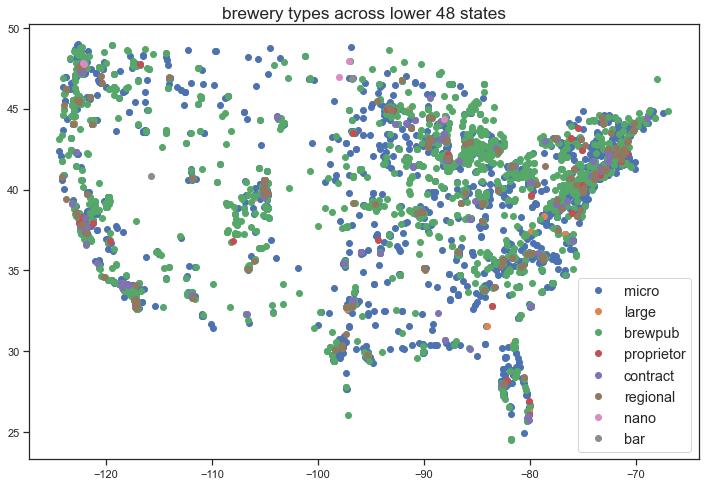

In [72]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(style="ticks")

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (12, 8)

file = './breweries.csv'
df = pd.read_csv(file)
display(df.head(2))

#select only the brewries in the states 
df = df[(df['country'] == 'United States') & (df['state'] != 'Alaska') & (df['state'] != 'Hawaii') \
        & (df['brewery_type']!='closed') & (df['brewery_type']!='planning')]

#drop the NaN values for those without location information
df['longitude'].dropna(axis=0, inplace=True)
df.dropna(subset=['longitude', 'latitude'], inplace=True)
#print (df.isnull().sum())

#plot the spatial distrubutioin of each brewries
longitude = df['longitude'].to_numpy()
latitude  = df['latitude'].to_numpy()
brewery_types = df['brewery_type'].unique()

brewery_types_summary = {}

for brewery_type in brewery_types:
    #print(brewery_type)
    sel   = df['brewery_type'] == brewery_type
    print (brewery_type, ":", sum (sel))
    brewery_types_summary[brewery_type] = sum (sel)
    plt.plot(df[sel].longitude, df[sel].latitude, 'o', alpha=1, label=brewery_type)
    #print(df['brewery_type'].unique())    
    plt.legend(loc='best', fontsize='x-large')    
plt.title("brewery types across lower 48 states", fontsize='xx-large')
plt.show()


#print(brewery_types_summary)

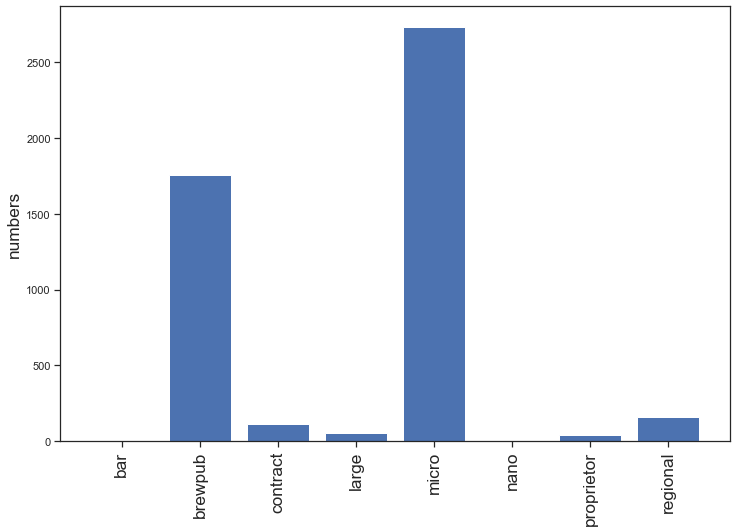

In [70]:
myList = brewery_types_summary.items()
myList = sorted(myList) 
labels, counts = zip(*myList) 
sorted_labels = np.arange(len(labels)) 

plt.bar(sorted_labels, counts)
plt.xticks(sorted_labels, labels, rotation='vertical', fontsize='xx-large')
plt.ylabel("numbers", fontsize='xx-large')
plt.show()

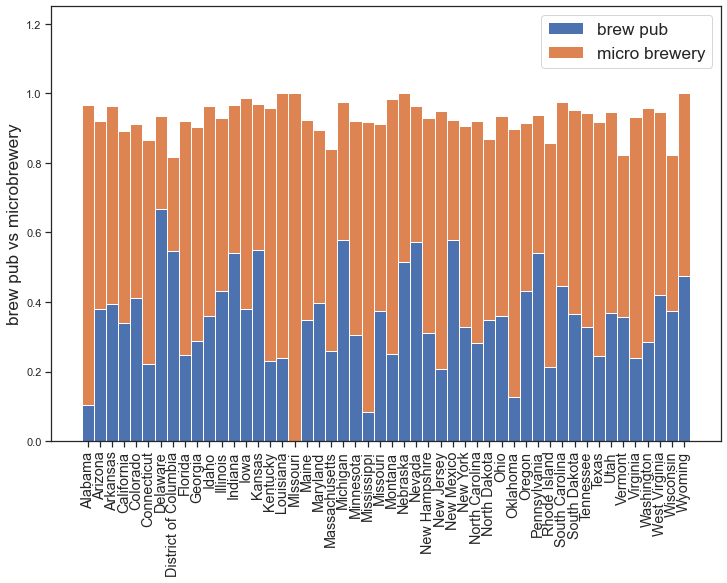

In [75]:
df = df.sort_values(by='state')
brewery_state = df['state'].unique()

brewpub_stat_per_state = {}
micro_stat_per_state = {}
for state in brewery_state:
    sel = (df['brewery_type'] == 'brewpub') & (df['state'] == state)
    brewpub = sum(sel)
    
    sel = (df['brewery_type'] == 'micro') & (df['state'] == state)
    micro = sum(sel)
    
    sel = (df['state'] == state)
    total = sum(sel)
    brewpub_stat_per_state[state] = brewpub / total
    micro_stat_per_state[state]   = micro   / total
    
bar_width = 1
    
brewpubList = brewpub_stat_per_state.items()
brewpub = sorted(brewpubList) 
states, brewpub = zip(*brewpub) 
sorted_states = np.arange(len(states)) 
plt.bar(sorted_states, brewpub, bar_width, label='brew pub')

microList = micro_stat_per_state.items()
microList = sorted(microList) 
states, micro = zip(*microList) 
sorted_states = np.arange(len(states)) 
plt.bar(sorted_states, micro, bar_width, bottom = brewpub,  label='micro brewery')

plt.xticks(sorted_states, states, rotation='vertical', fontsize='x-large')
plt.ylabel("brew pub vs microbrewery", fontsize='xx-large')
plt.legend(fontsize='xx-large')

plt.ylim([0, 1.25])
plt.show()        